#Imports

In [3]:
pip install --user statsmodels

In [4]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip list --user

Package     Version
----------- -------
patsy       0.5.6
scipy       1.13.0
statsmodels 0.14.2


In [23]:
pip install xgboost


     ---------------------------------------- 99.8/99.8 MB 6.5 MB/s eta 0:00:00


In [37]:
pip install shap


     -------------------------------------- 453.1/453.1 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 10.6 MB/s eta 0:00:00
     --------------------------------------- 28.1/28.1 MB 12.3 MB/s eta 0:00:00


In [38]:
pip install lime


     -------------------------------------- 275.7/275.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 24.5/24.5 MB 13.4 MB/s eta 0:00:00
     -------------------------------------- 225.0/225.0 kB 6.7 MB/s eta 0:00:00
     ------------------------------------- 313.5/313.5 kB 20.2 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=54b47f033acf46616e15b67f08512aeefbd57ae2acaa89b7ef0d49a545e3d5c5
  Stored in directory: c:\users\gbatu\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [6]:
import sys
import site
sys.path.append(site.USER_SITE)

In [313]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
from pandas import concat
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np
import shap
from lime import lime_tabular
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.cm as cm
import statsmodels.api as sm

#Data loading and preparation

In [594]:
#Load your time series data
#df = pd.read_csv('data_export.csv')
df_12 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2012.csv')
df_13 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2013.csv')
df_14 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2014.csv')
df_15 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2015.csv')
df_16 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2016.csv')
df_17 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2017.csv')
df_18 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2018.csv')
df_19 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2019.csv')
df_20 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2020.csv')
df_21 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2021.csv')
df_22 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2022.csv')
df_23 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2023.csv')
df_24 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2024.csv')

In [199]:
print(df_12.dtypes)

Unnamed: 0                         int64
CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID    

In [595]:
dfs = {
    2012: df_12,
    2013: df_13,
    2014: df_14,
    2015: df_15,
    2016: df_16,
    2017: df_17,
    2018: df_18,
    2019: df_19,
    2020: df_20,
    2021: df_21,
    2022: df_22,
    2023: df_23,
    2024: df_24
}

In [597]:
yearly_data = {}
monthly_data = {}
daily_data = {}
day_name_data = {}
day_counts = {}
average_day_name_data = {}
daily_sum = {}
hour_sum = {}

for year, df in dfs.items():
    # Convert 'CRASH DATE' to datetime
    df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
    
    # Extract Year, Month, Day, and Day of Week
    df['Year'] = df['CRASH DATE'].dt.year
    df['Month'] = df['CRASH DATE'].dt.month
    df['Day'] = df['CRASH DATE'].dt.day
    df['Day of Week'] = df['CRASH DATE'].dt.day_name()
    df['HOUR'] = df['CRASH TIME'].str.split(':').str[0].astype(int)

    # Aggregate data
    yearly_data[year] = df.groupby('Year')['NUMBER OF PERSONS INJURED'].sum().reset_index()
    monthly_data[year] = df.groupby('Month')['NUMBER OF PERSONS INJURED'].sum()
    daily_data[year] = df.groupby('Day')['NUMBER OF PERSONS INJURED'].sum()
    day_name_data[year] = df.groupby('Day of Week')['NUMBER OF PERSONS INJURED'].sum()
    daily_sum[year] = df.groupby('CRASH DATE')['NUMBER OF PERSONS INJURED'].sum()
    hour_sum[year] = df.groupby('HOUR')['NUMBER OF PERSONS INJURED'].sum()
    
    # Count the number of each day of the week in the year
    day_counts[year] = df['Day of Week'].value_counts()

    # Calculate the average number of injuries per day of the week
#     average_day_name_data[year] = day_name_data[year] / day_counts
average_day_name_data = {}
for key in day_counts:
    #if day_name_data[key] != 0:  # Check to avoid division by zero
    average_day_name_data[key] = day_counts[key] / day_name_data[key]
    #else:
    #    average_day_name_data[key] = None

#Time Series Initial Plots

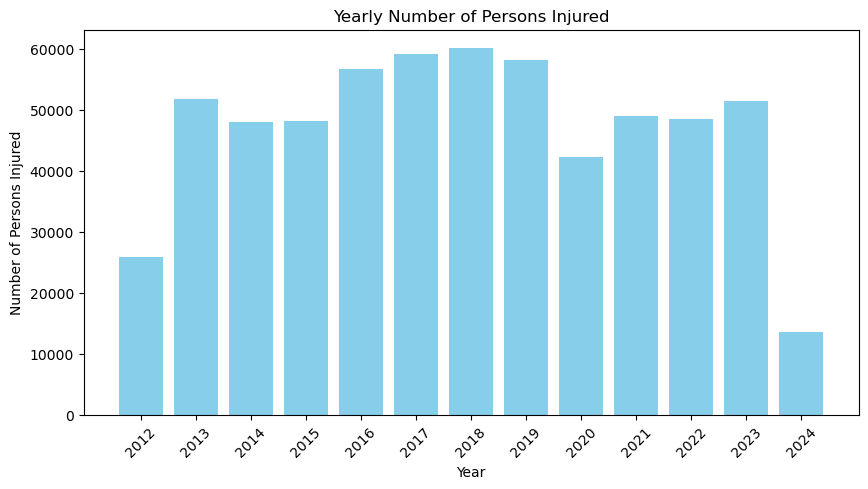

In [207]:
# Group by year and sum the y values
all_years_df = pd.concat(yearly_data.values(), ignore_index=True)
all_years_df = all_years_df.sort_values(by='Year')

#Create figure
plt.figure(figsize=(10, 5))
plt.bar(all_years_df['Year'], all_years_df['NUMBER OF PERSONS INJURED'], color='skyblue')
plt.title('Yearly Number of Persons Injured')
plt.xlabel('Year')
plt.ylabel('Number of Persons Injured')
plt.xticks(all_years_df['Year'], rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [266]:
# Convert each series into a DataFrame and assign to a new dictionary with years as keys
dataframes = {year: pd.DataFrame(data.values, index=data.index, columns=[year]) for year, data in monthly_data.items()}

# Combine all data frames into a single DataFrame
combined_df = pd.concat(dataframes.values(), axis=1)

# Reindex the DataFrame to include all months and sort it
combined_df = combined_df.reindex(range(1, 13)).sort_index()

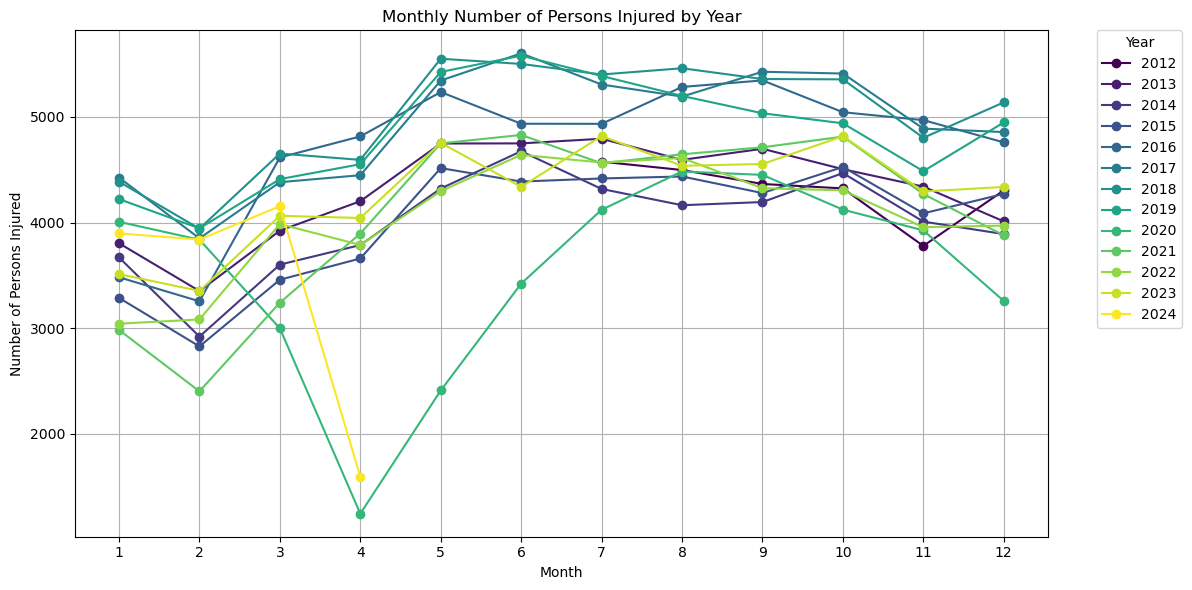

In [270]:
#Create figure for monthly number of person injured by year

plt.figure(figsize=(12, 6))

years = combined_df.columns
n_years = len(years)

# Create a colormap
color = cm.viridis(np.linspace(0, 1, n_years))

# for column in combined_df.columns:
#     plt.plot(combined_df.index, combined_df[column], marker='o', label=str(column))
    
for i, year in enumerate(years):
    plt.plot(combined_df.index, combined_df[year], marker='o', label=str(year), color=color[i])

plt.title('Monthly Number of Persons Injured by Year')
plt.xlabel('Month')
plt.ylabel('Number of Persons Injured')
plt.xticks(range(1, 13)) 
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.grid(True)
plt.show()

In [296]:
# Convert each series into a DataFrame and assign to a new dictionary with years as keys
dataframes = {year: pd.DataFrame(data.values, index=data.index, columns=[year]) for year, data in average_day_name_data.items()}

# Combine all data frames into a single DataFrame
combined_df = pd.concat(dataframes.values(), axis=1)

# Reindex the DataFrame to include all months and sort it
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# combined_df = combined_df.sort_index()
combined_df.index = pd.CategoricalIndex(combined_df.index, categories=sorter, ordered=True)

# Now sort the DataFrame by the index, which is your 'Day of Week'
combined_df = combined_df.sort_index()

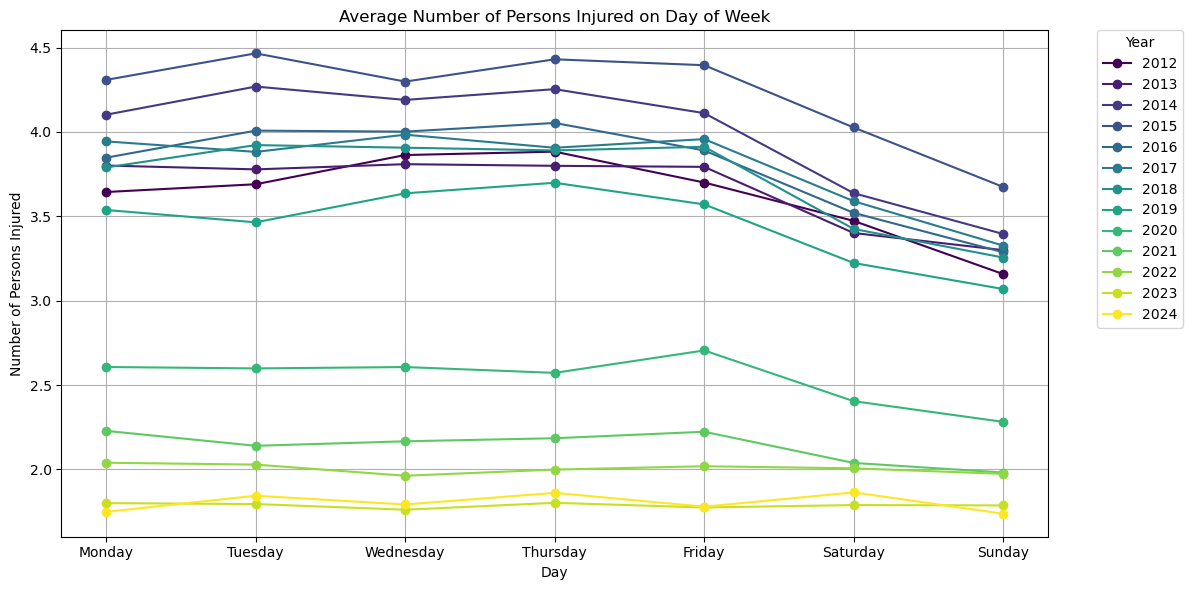

In [297]:
#Create figure for average number of person injured by day of week

plt.figure(figsize=(12, 6))

years = combined_df.columns
n_years = len(years)

# Create a colormap
color = cm.viridis(np.linspace(0, 1, n_years))

# for column in combined_df.columns:
#     plt.plot(combined_df.index, combined_df[column], marker='o', label=str(column))
    
for i, year in enumerate(years):
    plt.plot(combined_df.index, combined_df[year], marker='o', label=str(year), color=color[i])

plt.title('Average Number of Persons Injured on Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Persons Injured')
plt.xticks(combined_df.index)
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.grid(True)
plt.show()

In [605]:
# Convert each series into a DataFrame and assign to a new dictionary with years as keys
dataframes = {year: pd.DataFrame(data.values, index=data.index, columns=[year]) for year, data in hour_sum.items()}

# Combine all data frames into a single DataFrame
combined_df = pd.concat(dataframes.values(), axis=1)

# Reindex the DataFrame to include all months and sort it
combined_df = combined_df.reindex(range(0, 25)).sort_index()

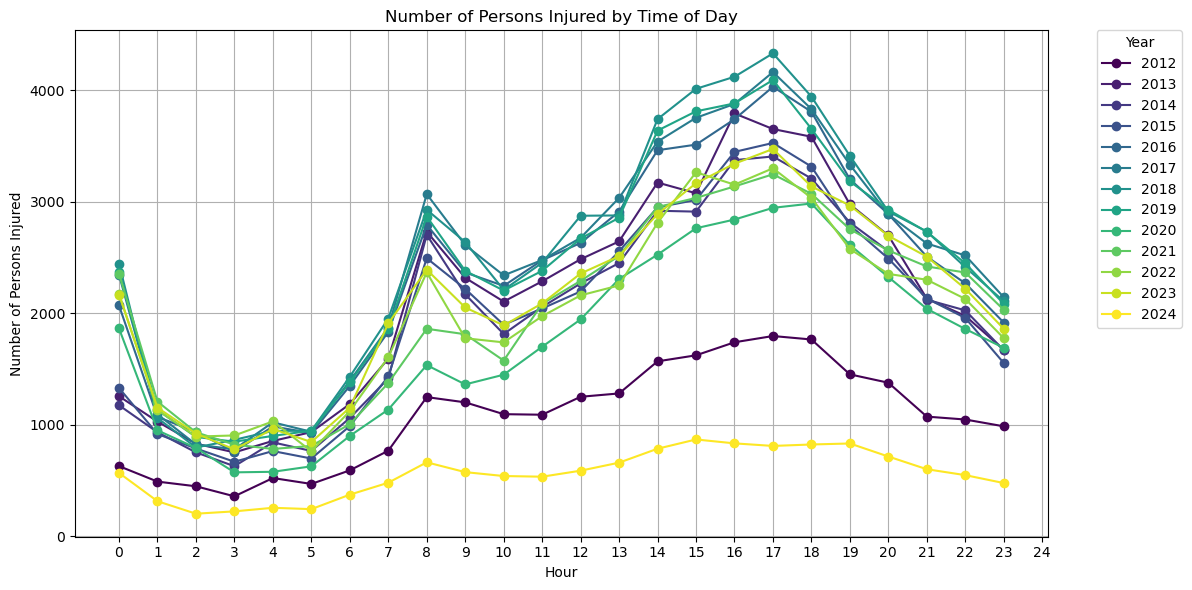

In [606]:
#Create figure for number of person injured by time of day

plt.figure(figsize=(12, 6))

years = combined_df.columns
n_years = len(years)

# Create a colormap
color = cm.viridis(np.linspace(0, 1, n_years))

# for column in combined_df.columns:
#     plt.plot(combined_df.index, combined_df[column], marker='o', label=str(column))
    
for i, year in enumerate(years):
    plt.plot(combined_df.index, combined_df[year], marker='o', label=str(year), color=color[i])

plt.title('Number of Persons Injured by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Persons Injured')
plt.xticks(combined_df.index)
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.grid(True)
plt.show()

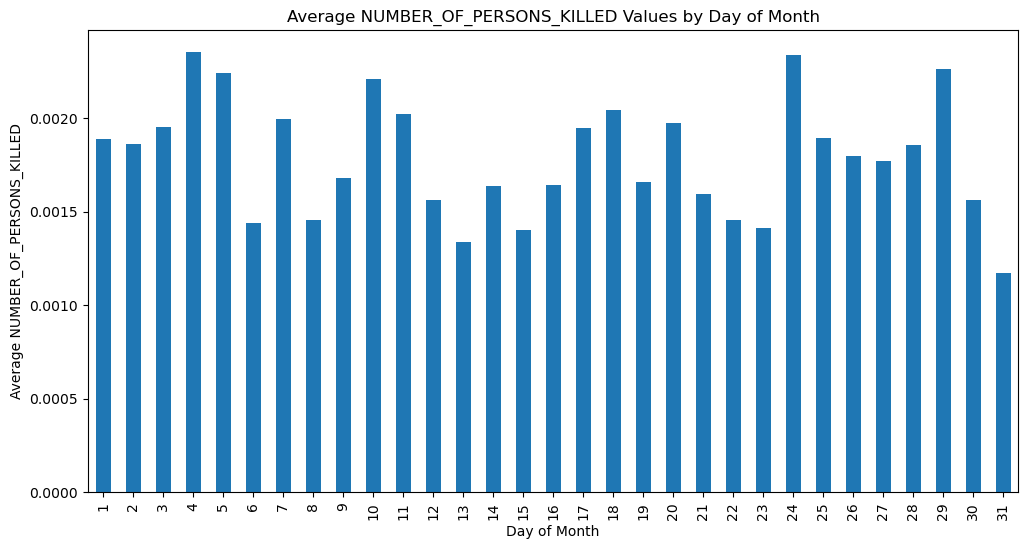

In [106]:
daily_data = df.groupby('Day')['NUMBER_OF_PERSONS_KILLED'].mean()

# Plotting
plt.figure(figsize=(12, 6))
daily_data.plot(kind='bar')
plt.title('Average NUMBER_OF_PERSONS_KILLED Values by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average NUMBER_OF_PERSONS_KILLED')
plt.show()

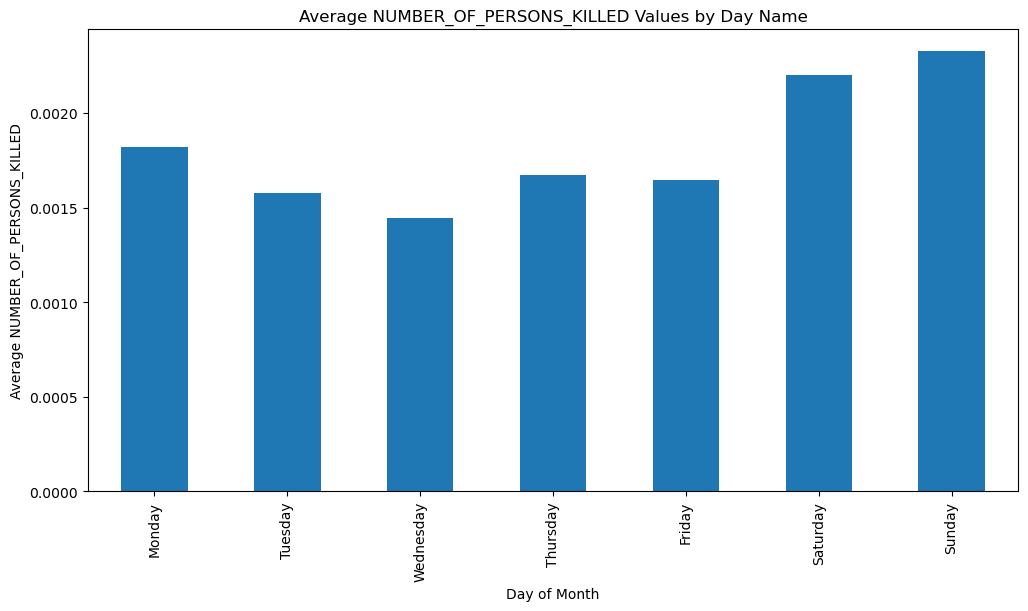

In [188]:
daily_data = df.groupby('Day of Week')['NUMBER_OF_PERSONS_KILLED'].mean()

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=sorter, ordered=True)

# Plotting
plt.figure(figsize=(12, 6))
daily_data.plot(kind='bar')
plt.title('Average NUMBER_OF_PERSONS_KILLED Values by Day Name')
plt.xlabel('Day of Month')
plt.ylabel('Average NUMBER_OF_PERSONS_KILLED')
plt.show()

#Time Series Naive Baseline

In [174]:
df_date_only = df[['CRASH_DATE','NUMBER_OF_PERSONS_KILLED']]

#remove nan
nan_count = df_date_only.isnull().sum().sum()
print('Number of NaN values:', nan_count)
df_date_only = df_date_only.dropna() 
nan_count = df_date_only.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 12
Number of NaN values: 0


In [132]:
df_injured_only = df[['CRASH_DATE','NUMBER_OF_PERSONS_INJURED']]

#remove nan
nan_count = df_injured_only.isnull().sum().sum()
print('Number of NaN values:', nan_count)
df_injured_only = df_injured_only.dropna() 
nan_count = df_injured_only.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 5
Number of NaN values: 0


In [133]:
df_injured_only = df_injured_only.groupby('CRASH_DATE')['NUMBER_OF_PERSONS_INJURED'].sum()

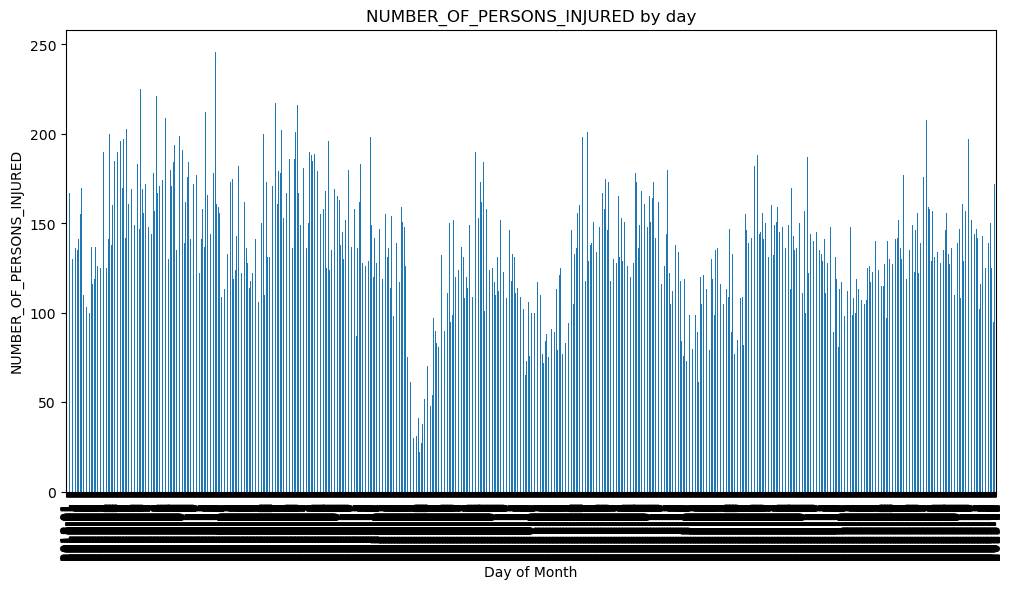

In [120]:
plt.figure(figsize=(12, 6))
df_injured_only.plot(kind='bar')
plt.title('NUMBER_OF_PERSONS_INJURED by day')
plt.xlabel('Day of Month')
plt.ylabel('NUMBER_OF_PERSONS_INJURED')
plt.show()

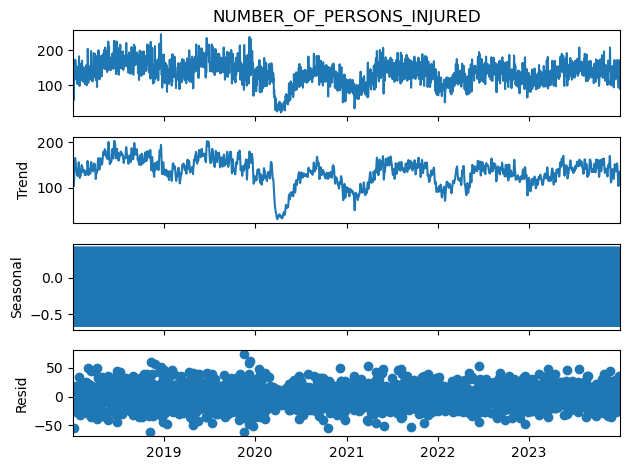

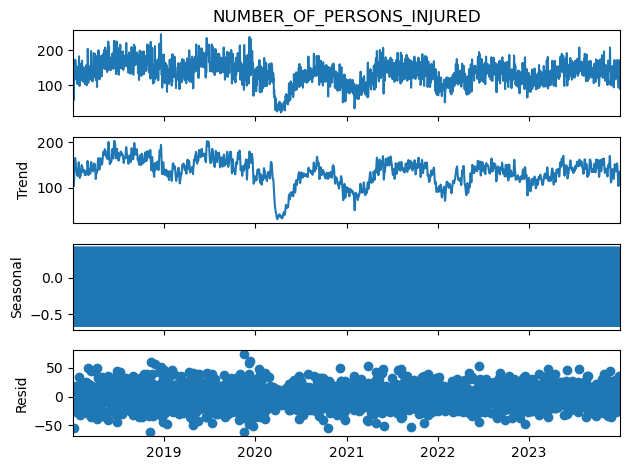

In [80]:
result = seasonal_decompose(df_injured_only,period=4,model='additive')
result.plot()

In [176]:
# Ensure data is sorted by date if it's not
df_date_only['CRASH_DATE'] = pd.to_datetime(df_date_only['CRASH_DATE'])  # replace 'date' with your actual date column name
df_date_only.sort_values('CRASH_DATE', inplace=True)

# Set the date column as the index
df_date_only.set_index('CRASH_DATE', inplace=True)

time_series = df_date_only['NUMBER_OF_PERSONS_KILLED']

In [98]:
# Creating the naive forecast
naive_forecast = time_series.shift(1)

# Define a split point, keeping the last 20% of data for testing
split_point = int(len(time_series) * 0.8)
train, test = time_series[:split_point], time_series[split_point:]
naive_forecast_train, naive_forecast_test = naive_forecast[:split_point], naive_forecast[split_point:]
print("length of train: ")
print(train.shape)
print("length of test: ")
print(test.shape)

# Calculate MAE
mae = mean_absolute_error(test[1:], naive_forecast_test[1:])  # we skip the first element as it's NaN due to shift
print(f'Mean Absolute Error of the Naive Forecast: {mae}')

length of train: 
(637044,)
length of test: 
(159261,)
Mean Absolute Error of the Naive Forecast: 0.005475323370588974


In [100]:
nan_count = df_date_only.isnull().sum().sum()
print('Number of NaN values:', nan_count)
df_date_only = df_date_only.dropna() 
nan_count = df_date_only.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0
Number of NaN values: 0


In [177]:
df_sum_by_day = df.groupby('CRASH_DATE')['NUMBER_OF_PERSONS_KILLED'].sum()

#Seasonality

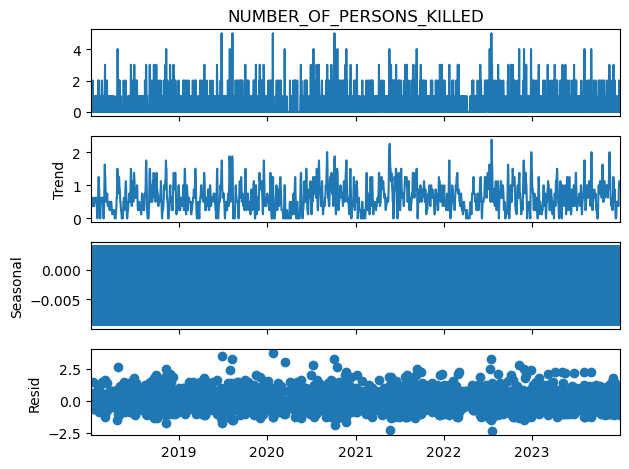

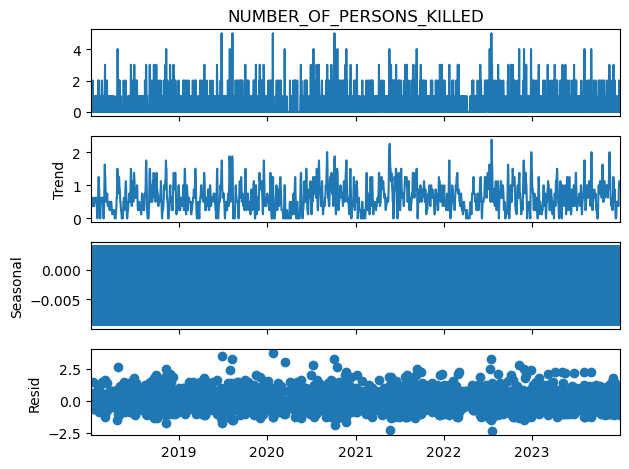

In [180]:
result = seasonal_decompose(df_sum_by_day,period=4,model='additive')
result.plot()

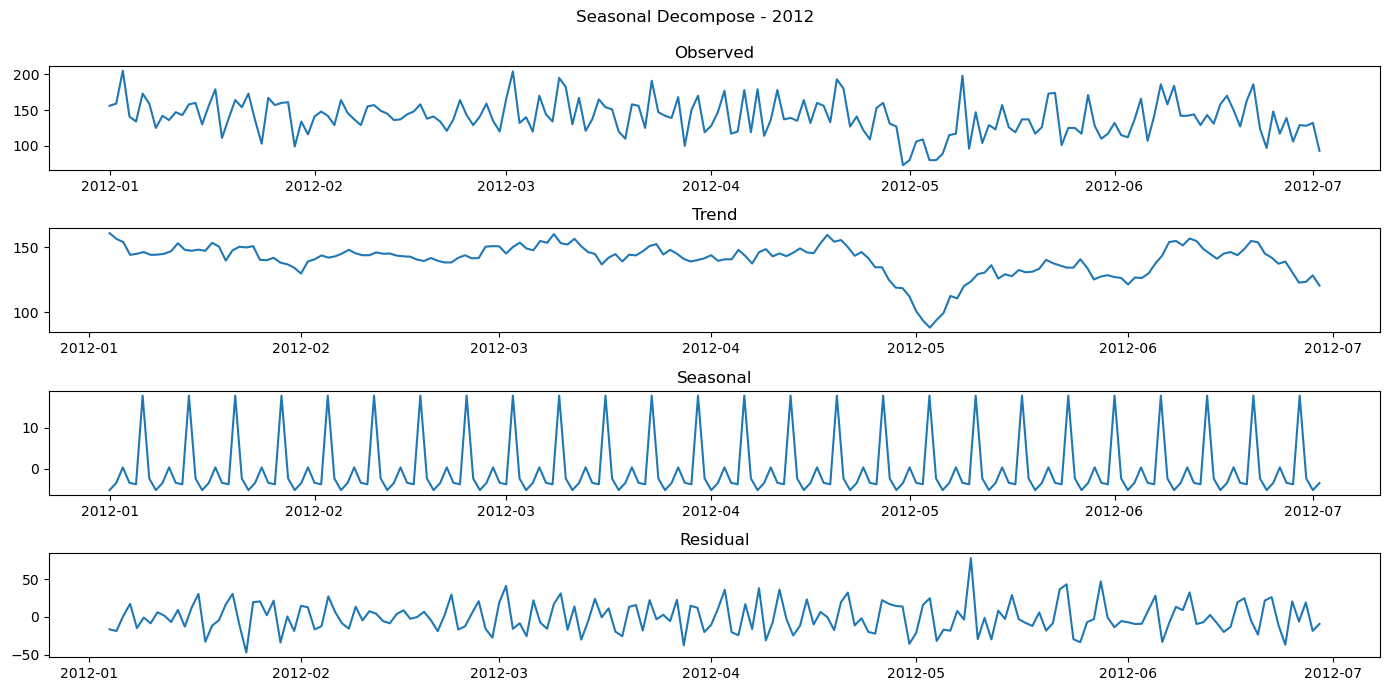

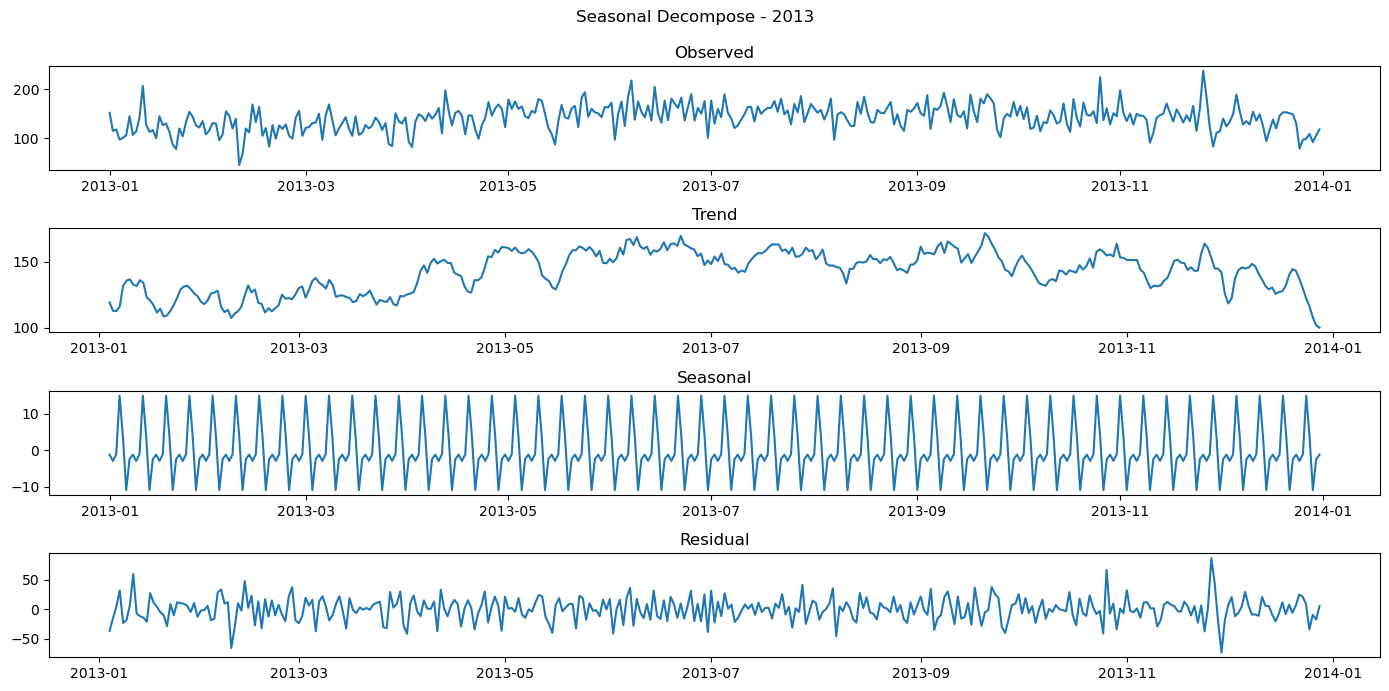

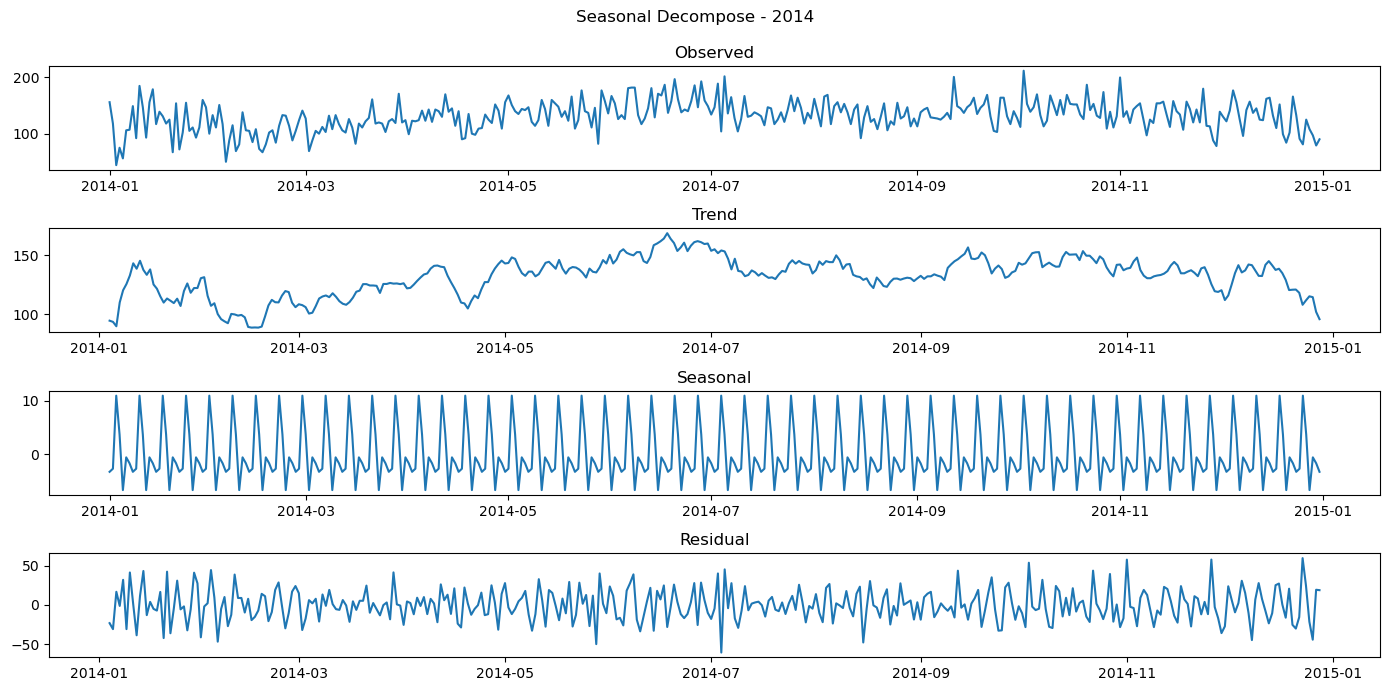

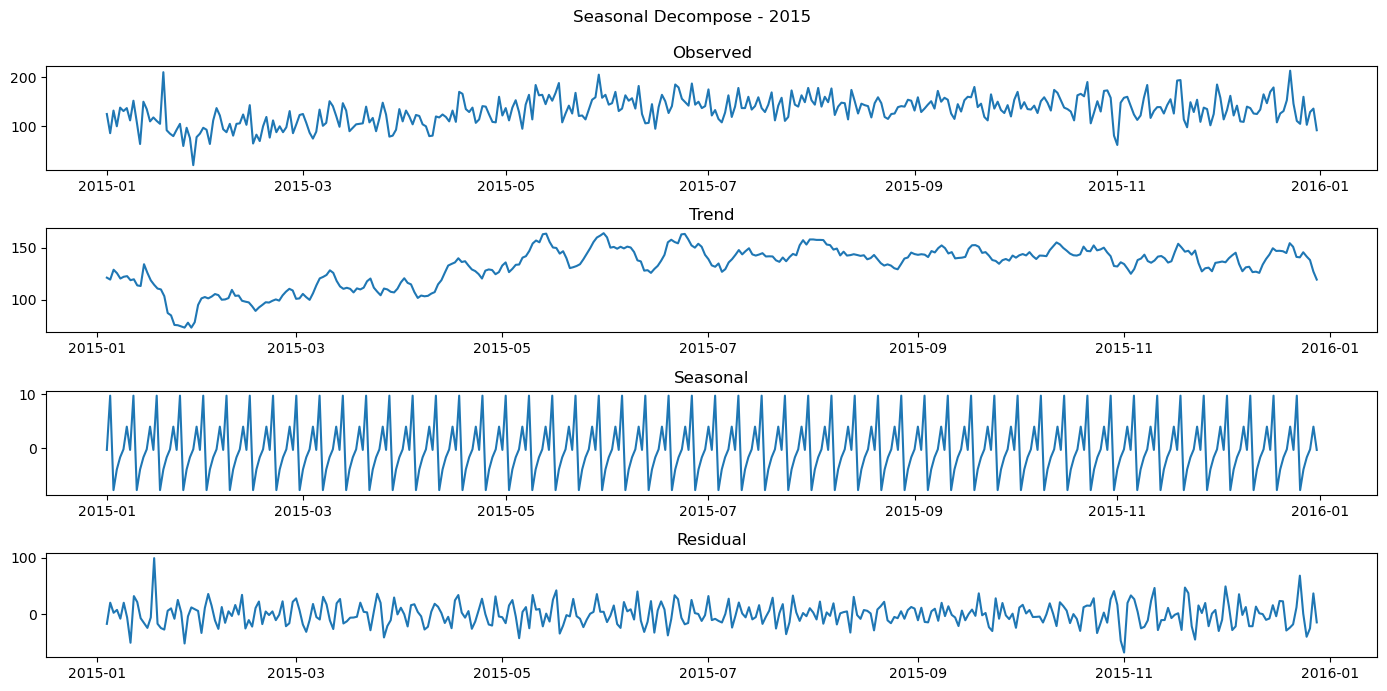

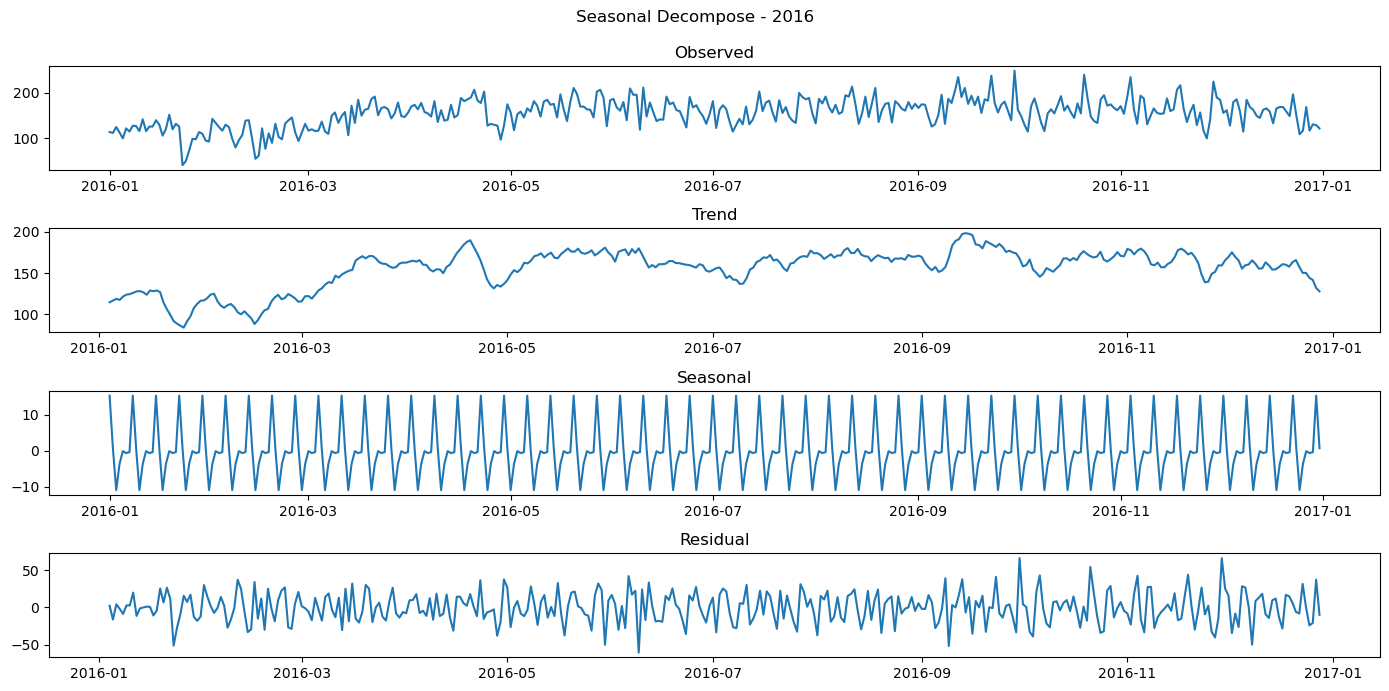

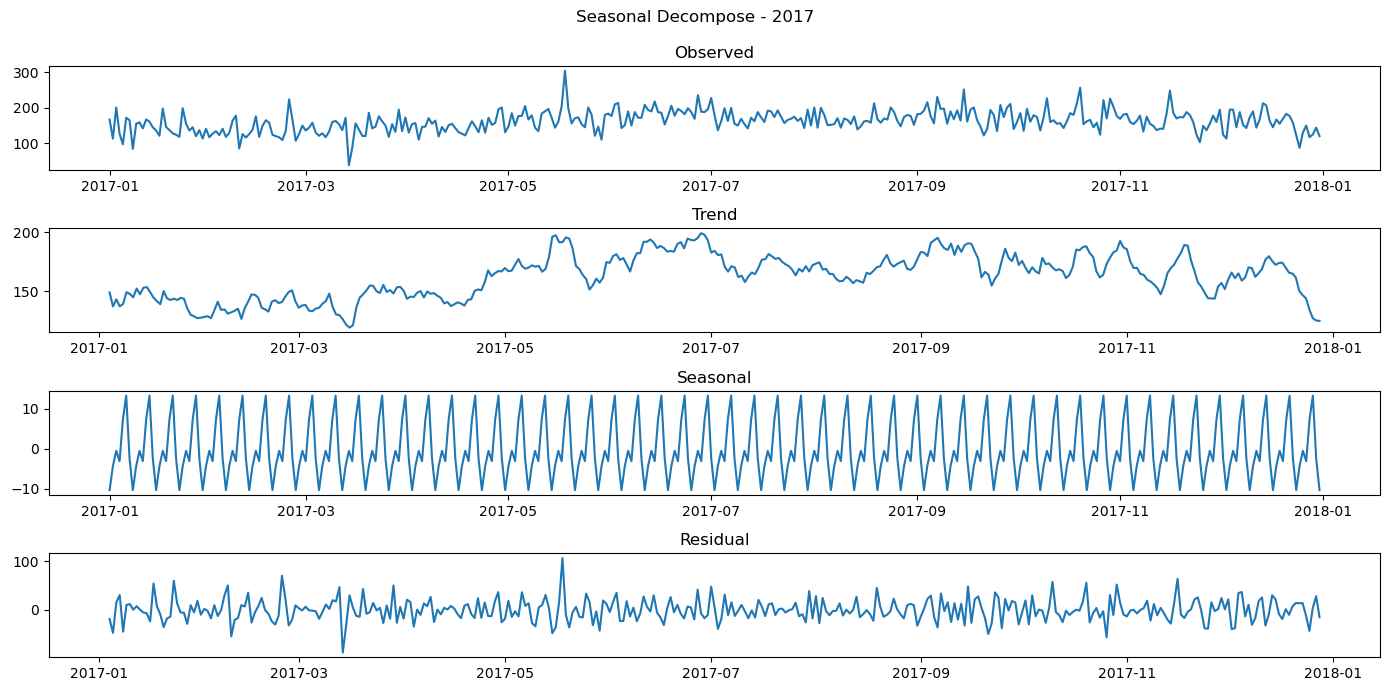

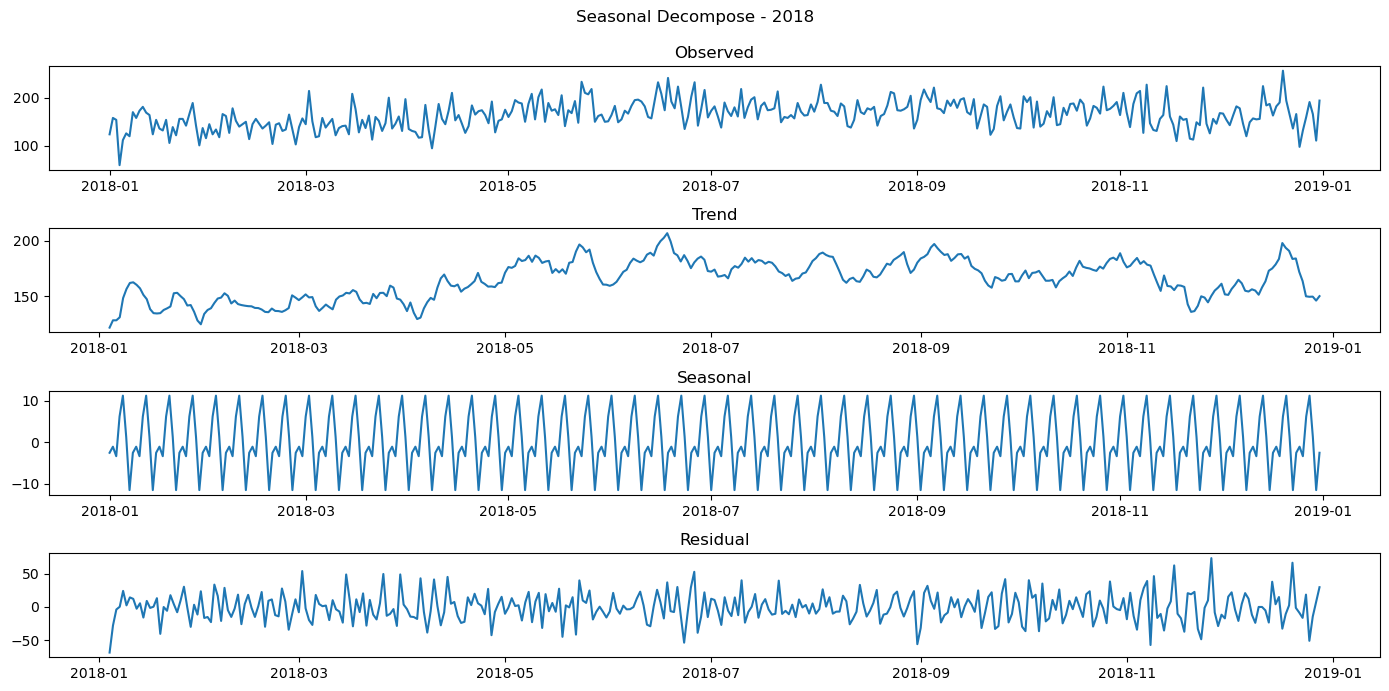

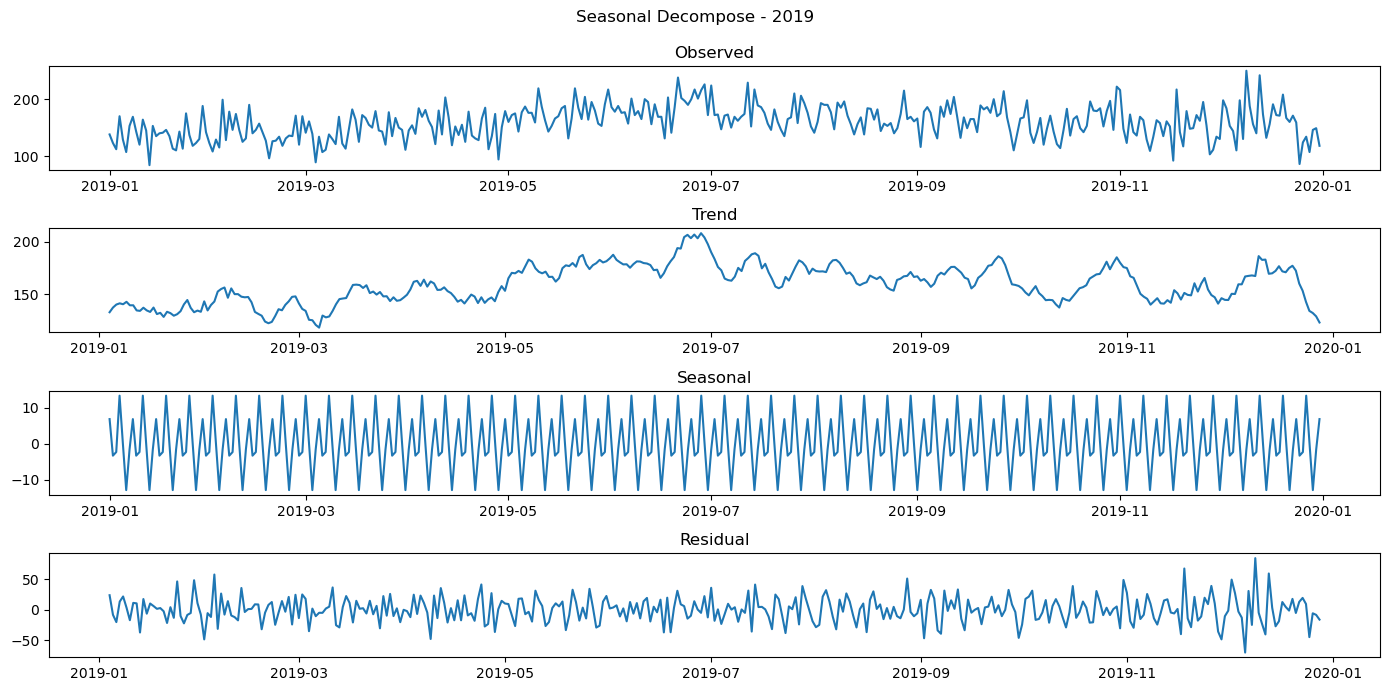

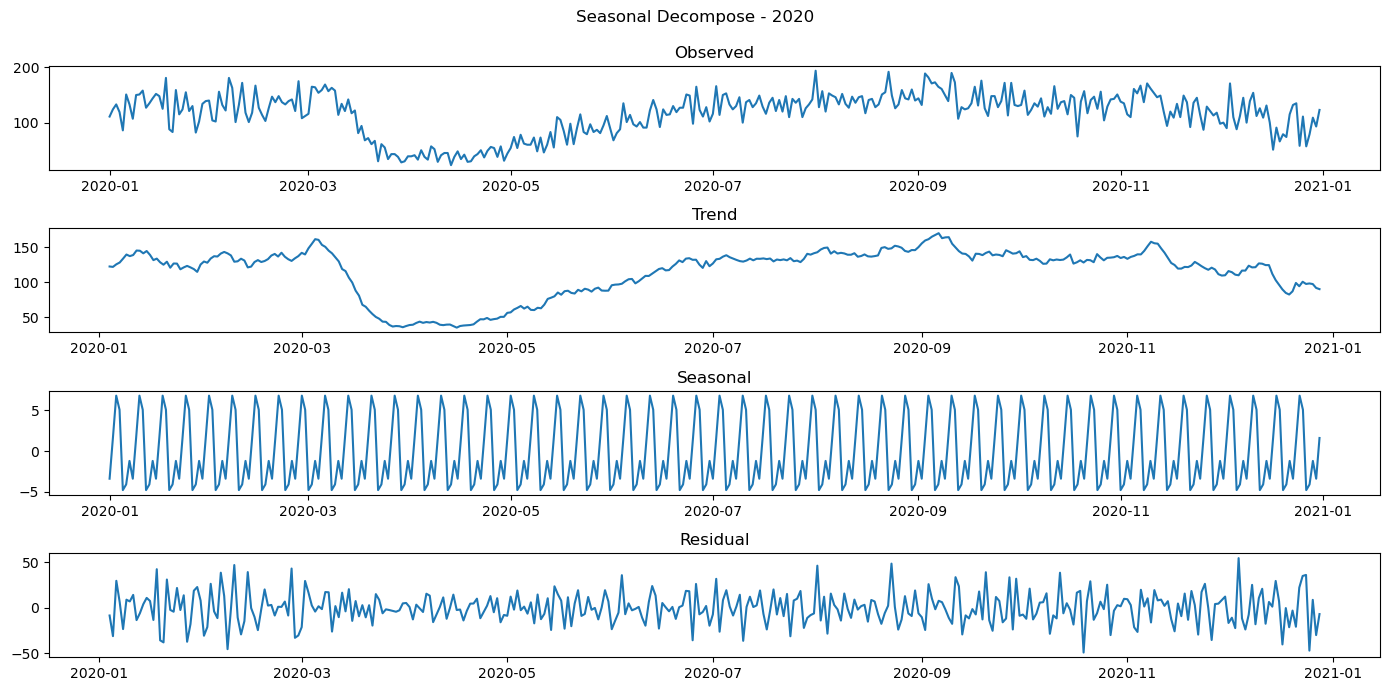

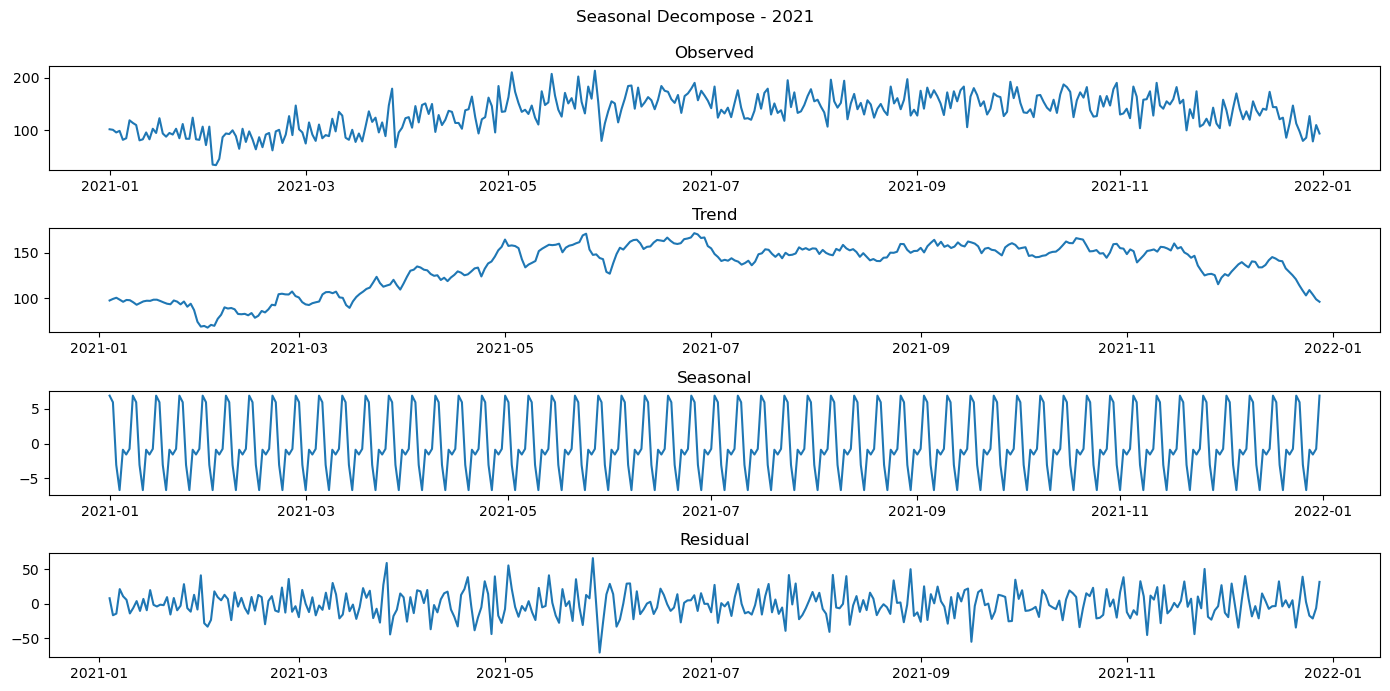

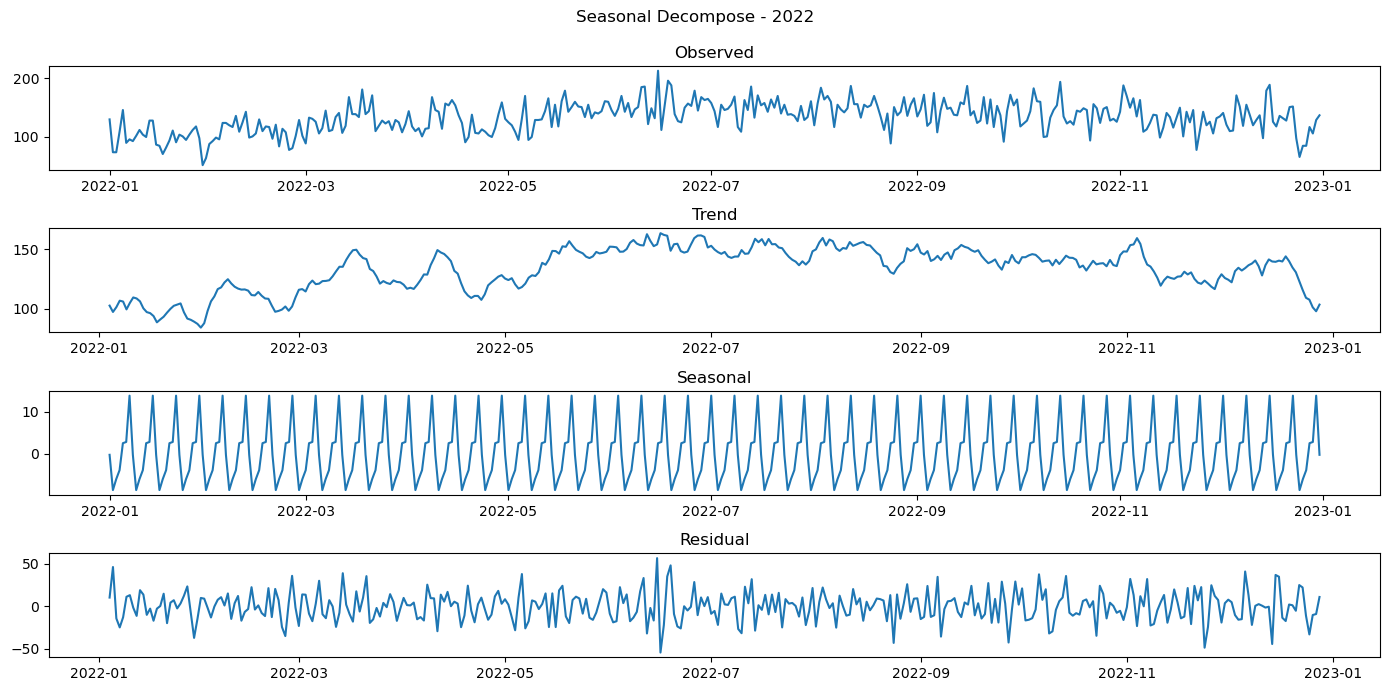

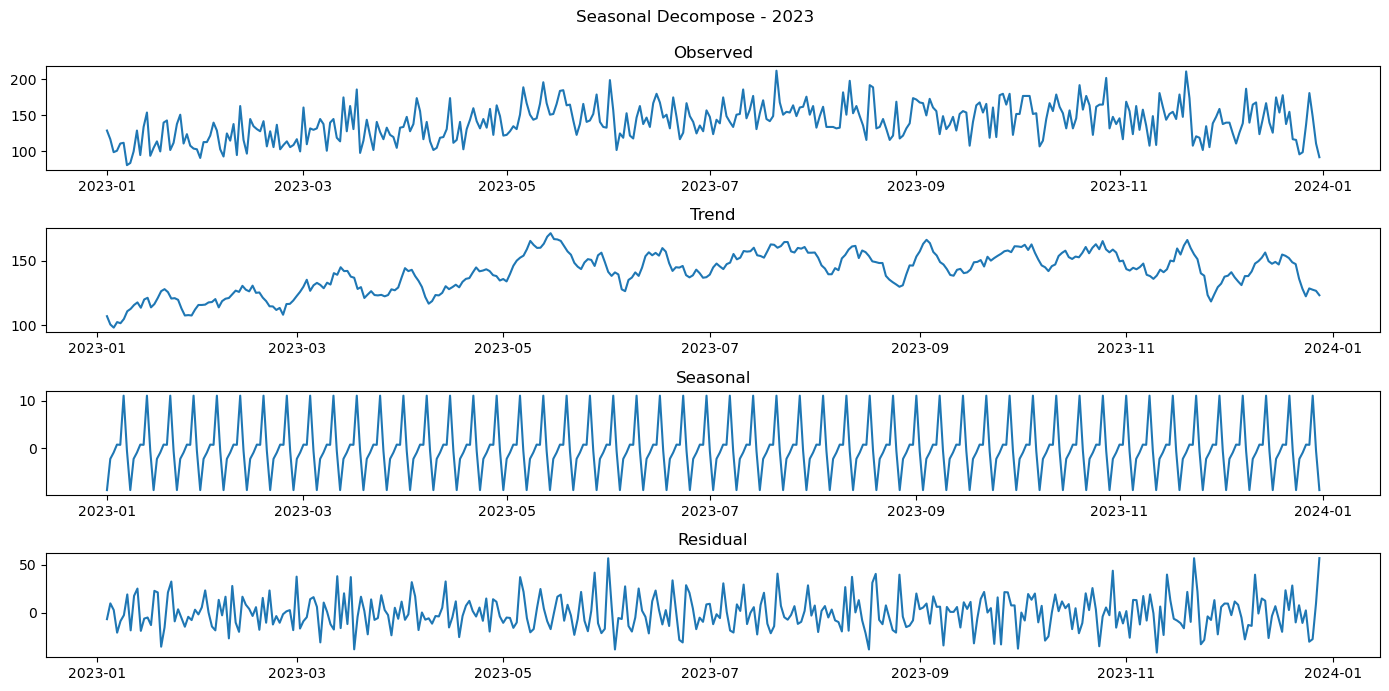

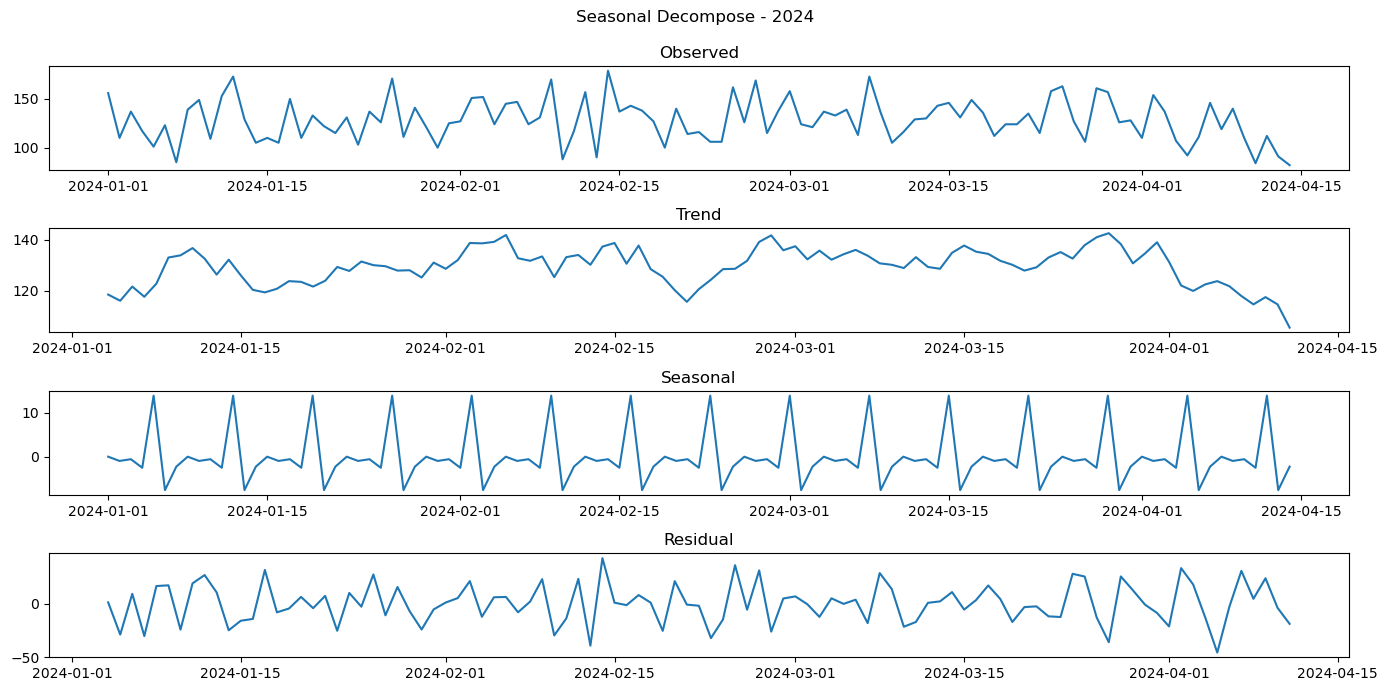

In [307]:
# Storing the decomposition results
decomposition_results = {}

# Adjust data to have a proper datetime index
for year, series in daily_sum.items():
    # Create a date range for each year starting January 1
    dates = pd.date_range(start=f'{year}-01-01', periods=len(series), freq='D')
    
    # Assign the date range as the index of the series
    series.index = dates
    
    # Decompose the data
    decomposition = seasonal_decompose(series, model='additive')

    # Plot the decomposition
    plt.figure(figsize=(14, 7))
    plt.suptitle(f'Seasonal Decompose - {year}')
    
    # Plot observed
    plt.subplot(411)
    plt.plot(decomposition.observed)
    plt.title('Observed', fontsize=12)
    
    # Plot trend
    plt.subplot(412)
    plt.plot(decomposition.trend)
    plt.title('Trend', fontsize=12)
    
    # Plot seasonal
    plt.subplot(413)
    plt.plot(decomposition.seasonal)
    plt.title('Seasonal', fontsize=12)
    
    # Plot residuals
    plt.subplot(414)
    plt.plot(decomposition.resid)
    plt.title('Residual', fontsize=12)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust subplots to fit suptitle
    plt.show()

#Stationarity

In [191]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_sum_by_day)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -46.48709082955445
ADF p-values: 0.0
ADF number of lags used: 0
ADF number of observations: 2189
ADF critical values: {'1%': -3.4333408565184294, '5%': -2.8628612620249507, '10%': -2.5674733728800154}
ADF best information criterion: 5496.45067418557


In [188]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(monthly_data)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -1.38935623804986
ADF p-values: 0.5873681008487897
ADF number of lags used: 0
ADF number of observations: 11
ADF critical values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF best information criterion: -108.00989656437844


In [125]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_injured_only)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -3.2029868694342323
ADF p-values: 0.0198124371679654
ADF number of lags used: 20
ADF number of observations: 2169
ADF critical values: {'1%': -3.4333684674663467, '5%': -2.8628734534635902, '10%': -2.5674798640234444}
ADF best information criterion: 19682.930059765982


In [309]:
for year, series in daily_sum.items():
    # Create a date range for each year starting January 1
    dates = pd.date_range(start=f'{year}-01-01', periods=len(series), freq='D')
    
    # Assign the date range as the index of the series
    series.index = dates
    
    adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(series)
    print(year)
    print('ADF test statistic:', adf)
    print('ADF p-values:', pval)
    print('ADF number of lags used:', usedlag)
    print('ADF number of observations:', nobs)
    print('ADF critical values:', crit_vals)
    print('ADF best information criterion:', icbest)

2012
ADF test statistic: -6.077623840906846
ADF p-values: 1.1117522328131819e-07
ADF number of lags used: 2
ADF number of observations: 181
ADF critical values: {'1%': -3.467004502498507, '5%': -2.8776444997243558, '10%': -2.575355189707274}
ADF best information criterion: 1569.3103747383286
2013
ADF test statistic: -1.9383067314797189
ADF p-values: 0.314260441736169
ADF number of lags used: 13
ADF number of observations: 351
ADF critical values: {'1%': -3.44911857009962, '5%': -2.8698097654570507, '10%': -2.5711757061225153}
ADF best information criterion: 3208.062157398464
2014
ADF test statistic: -3.1553126136527863
ADF p-values: 0.02272150691572982
ADF number of lags used: 8
ADF number of observations: 356
ADF critical values: {'1%': -3.448853029339765, '5%': -2.869693115704379, '10%': -2.571113512498422}
ADF best information criterion: 3183.686915297983
2015
ADF test statistic: -3.1293062050592737
ADF p-values: 0.024459054383080926
ADF number of lags used: 6
ADF number of observat

#SARIMAX

In [155]:
#series = pd.read_csv('data_export.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series = df_injured_only
#series.index = series.index.to_period('M')

In [167]:
# Chronological train-test split
split_point = int(len(series) * 0.9)
#X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
#y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]
X = series[:split_point]
y = series[split_point:]

In [538]:
series = daily_sum[2023]

In [587]:
p=2
d=2
q=1

P=1
D=2
Q=1
m=12

# Example SARIMAX model #use 2023
model = sm.tsa.statespace.SARIMAX(X,
                                  order=(p, d, q),
                                  seasonal_order=(P, D, Q, m),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:          NUMBER OF PERSONS INJURED   No. Observations:                  328
Model:             SARIMAX(2, 2, 1)x(1, 2, 1, 12)   Log Likelihood               -1403.910
Date:                            Thu, 02 May 2024   AIC                           2819.820
Time:                                    15:13:18   BIC                           2841.798
Sample:                                01-01-2023   HQIC                          2828.628
                                     - 11-24-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5496      0.071     -7.771      0.000      -0.688      -0.411
ar.L2         -0.2678      0.065   

In [588]:
mae = mean_absolute_error(y.values, forecast.values)
print("MAE: ",mae)
mse = mean_squared_error(y.values, forecast.values)
print("MSE: ",mae)
mape = np.mean(np.abs((y.values - forecast.values) / y.values)) * 100
print("MAPE: ",mae)

MAE:  28.2502255463629
MSE:  28.2502255463629
MAPE:  28.2502255463629


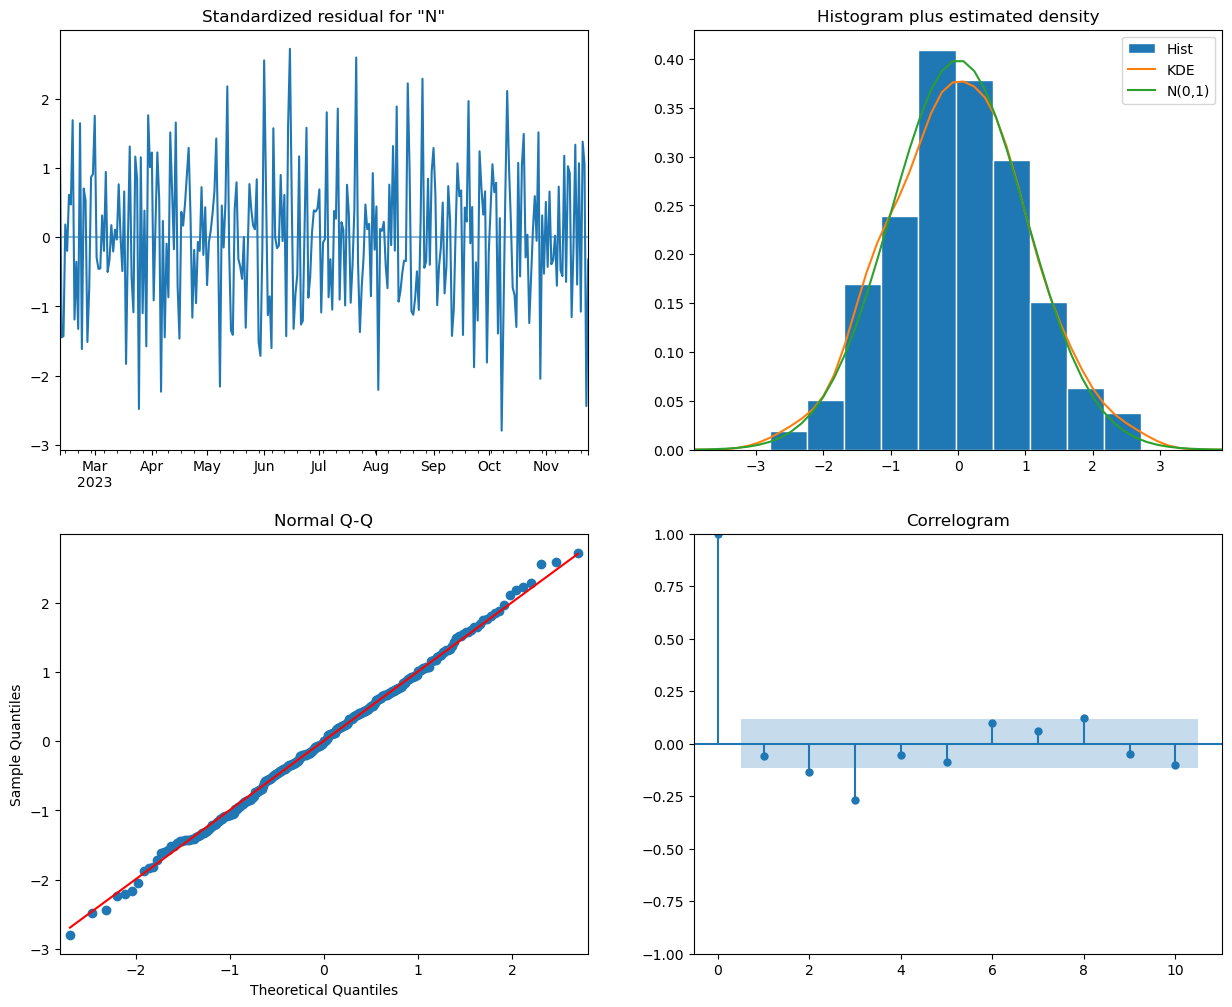

In [589]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

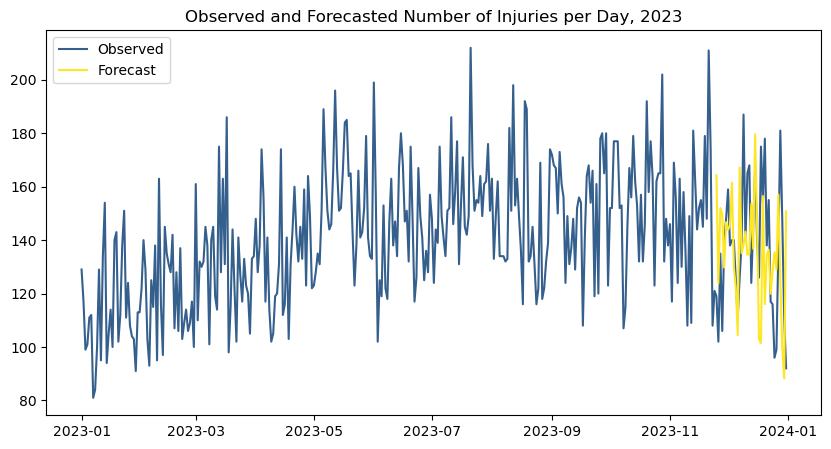

In [616]:
pred = results.get_forecast(steps=37)  # Forecasting 37 time periods ahead
forecast = pred.predicted_mean
confidence_intervals = pred.conf_int()

first_color = plt.cm.viridis(0.3)  # First color
last_color = plt.cm.viridis(1.0)   # Last color

# Plotting the forecast alongside historical data
plt.figure(figsize=(10, 5))
plt.plot(series.index, series.values, label='Observed', color= first_color)
plt.plot(forecast.index, forecast.values, label='Forecast', color= last_color)
# plt.fill_between(forecast.index,
#                 confidence_intervals.iloc[:, 0],
#                 confidence_intervals.iloc[:, 1], color='pink')
plt.title("Observed and Forecasted Number of Injuries per Day, 2023")
plt.legend()
plt.show()


In [1]:
# df_date_only
# df_sum_by_day = df.groupby('CRASH_DATE')['NUMBER_OF_PERSONS_KILLED'].sum()
# df_sum_by_day

#chance of injury NUMBER_OF_PERSONS_INJURED

In [66]:
df_injury_chance = df[['NUMBER_OF_PERSONS_INJURED','OID_', 'CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5']]

In [433]:
df_23.columns

Index(['Unnamed: 0', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'YEAR', 'Year', 'Month', 'Day', 'Day of Week', 'Person Injured'],
      dtype='object')

In [436]:
df_23.head()

Unnamed: 0 CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  \
21229     1984193 2023-01-01        NaN     QUEENS   11418.0  40.701218   
21187     1984115 2023-01-01        NaN  MANHATTAN   10002.0  40.721110   
21186     1984114 2023-01-01        NaN          0       0.0  40.696663   
21185     1984113 2023-01-01        NaN  MANHATTAN   10031.0  40.827103   
21184     1984109 2023-01-01        NaN     QUEENS   11370.0  40.767200   

       LONGITUDE                LOCATION              ON STREET NAME  \
21229 -73.816220  (40.701218, -73.81622)                           0   
21187 -73.985016  (40.72111, -73.985016)                           0   
21186 -73.980850  (40.696663, -73.98085)  BROOKLYN QUEENS EXPRESSWAY   
21185 -73.949960  (40.827103, -73.94996)                    BROADWAY   
21184 -73.887825   (40.7672, -73.887825)                   82 STREET   

           CROSS STREET NAME  ... VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  \
21229                      0  ...               Sedan                    0   
21187                      0  ...           AMBULANCE                    0   
21186                      0  ...                   0                    0   
21185                      0  ...               Sedan                    0   
21184  GRAND CENTRAL PARKWAY  ...                   0                    0   

       VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5  YEAR  Year  Month  Day  \
21229                    0                    0  2023  2023      1    1   
21187                    0                    0  2023  2023      1    1   
21186                    0                    0  2023  2023      1    1   
21185                    0                    0  2023  2023      1    1   
21184                    0                    0  2023  2023      1    1   

       Day of Week Person Injured  
21229       Sunday          False  
21187       Sunday          False  
21186       Sunday          False  
21185       Sunday          False  
21184       Sunday          False  

[5 rows x 36 columns]

In [435]:
df_23['CONTRIBUTING FACTOR VEHICLE 1']

21229    Passing or Lane Usage Improper
21187    Driver Inattention/Distraction
21186             Following Too Closely
21185               Alcohol Involvement
21184             Following Too Closely
                      ...              
91744    Driver Inattention/Distraction
91346    Driver Inattention/Distraction
91345    Driver Inattention/Distraction
91355                       Unspecified
91361    Driver Inattention/Distraction
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 91888, dtype: object

In [506]:
df_23 = pd.read_csv(r'\Users\gbatu\Downloads\Cleaned data\Cleaned data\Cleaned_for_2023.csv')
df_23.head()

Unnamed: 0  CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  \
0        4635  2023-11-17      21:28  MANHATTAN   10014.0  40.734500   
1        4663  2023-11-16      15:45     QUEENS   11367.0  40.726604   
2        5892  2023-11-16       7:30   BROOKLYN   11237.0  40.703976   
3        7043  2023-11-17       6:57     QUEENS   11435.0  40.703823   
4        7183  2023-10-31       7:45   BROOKLYN   11234.0  40.634483   

   LONGITUDE                LOCATION     ON STREET NAME CROSS STREET NAME  \
0  -74.00118    (40.7345, -74.00118)                NaN               NaN   
1  -73.81425  (40.726604, -73.81425)         153 STREET         73 AVENUE   
2  -73.92309  (40.703976, -73.92309)  WILLOUGHBY AVENUE               NaN   
3  -73.81173  (40.703823, -73.81173)                NaN               NaN   
4  -73.91886  (40.634483, -73.91886)      GLENWOOD ROAD      RALPH AVENUE   

   ... CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0  ...                           NaN                            NaN   
1  ...                           NaN                            NaN   
2  ...                           NaN                            NaN   
3  ...                           NaN                            NaN   
4  ...                           NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                            NaN       4680128   
1                            NaN       4679634   
2                            NaN       4679566   
3                            NaN       4679868   
4                            NaN       4680342   

                   VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  \
0                               E-Bike                Sedan   
1                           Motorcycle                  NaN   
2  Station Wagon/Sport Utility Vehicle                  NaN   
3                                Sedan                  NaN   
4                                Sedan                  Bus   

   VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5  YEAR  
0                  NaN                  NaN                  NaN  2023  
1                  NaN                  NaN                  NaN  2023  
2                  NaN                  NaN                  NaN  2023  
3                  NaN                  NaN                  NaN  2023  
4                  NaN                  NaN                  NaN  2023  

[5 rows x 31 columns]

In [507]:
df_injury_chance.dtypes

Unnamed: 0                                int64
CRASH DATE                       datetime64[ns]
CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                float64
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2           

In [508]:
df_injury_chance = df_23
df_injury_chance['Person Injured'] = ((df_23['NUMBER OF PERSONS INJURED'] > 1) | (df_23['NUMBER OF PERSONS KILLED'] > 1))
df_injury_chance['CRASH DATE'] = pd.to_datetime(df_injury_chance['CRASH DATE'])
df_injury_chance['Year'] = df_injury_chance['CRASH DATE'].dt.year
df_injury_chance['Month'] = df_injury_chance['CRASH DATE'].dt.month
df_injury_chance['Day'] = df_injury_chance['CRASH DATE'].dt.day
df_injury_chance['Day of Week'] = df_injury_chance['CRASH DATE'].dt.day_name()
df_injury_chance['HOUR'] = df_injury_chance['CRASH TIME'].str.split(':').str[0].astype(int)

In [509]:
df_injury_chance.dtypes

Unnamed: 0                                int64
CRASH DATE                       datetime64[ns]
CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                float64
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2           

In [510]:
df_injury_chance.head()

Unnamed: 0 CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  \
0        4635 2023-11-17      21:28  MANHATTAN   10014.0  40.734500   
1        4663 2023-11-16      15:45     QUEENS   11367.0  40.726604   
2        5892 2023-11-16       7:30   BROOKLYN   11237.0  40.703976   
3        7043 2023-11-17       6:57     QUEENS   11435.0  40.703823   
4        7183 2023-10-31       7:45   BROOKLYN   11234.0  40.634483   

   LONGITUDE                LOCATION     ON STREET NAME CROSS STREET NAME  \
0  -74.00118    (40.7345, -74.00118)                NaN               NaN   
1  -73.81425  (40.726604, -73.81425)         153 STREET         73 AVENUE   
2  -73.92309  (40.703976, -73.92309)  WILLOUGHBY AVENUE               NaN   
3  -73.81173  (40.703823, -73.81173)                NaN               NaN   
4  -73.91886  (40.634483, -73.91886)      GLENWOOD ROAD      RALPH AVENUE   

   ... VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5  YEAR  \
0  ...                 NaN                  NaN                  NaN  2023   
1  ...                 NaN                  NaN                  NaN  2023   
2  ...                 NaN                  NaN                  NaN  2023   
3  ...                 NaN                  NaN                  NaN  2023   
4  ...                 NaN                  NaN                  NaN  2023   

   Person Injured  Year  Month  Day  Day of Week HOUR  
0           False  2023     11   17       Friday   21  
1           False  2023     11   16     Thursday   15  
2           False  2023     11   16     Thursday    7  
3           False  2023     11   17       Friday    6  
4           False  2023     10   31      Tuesday    7  

[5 rows x 37 columns]

In [511]:
df_injury_chance = df_injury_chance[[
    'Person Injured',
    "CRASH DATE",
    "BOROUGH",
    "ZIP CODE",
    "LATITUDE",
    "LONGITUDE",
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    "VEHICLE TYPE CODE 1",
    "VEHICLE TYPE CODE 2",
    "VEHICLE TYPE CODE 3",
    "VEHICLE TYPE CODE 4",
    "VEHICLE TYPE CODE 5",
    "Year",
    "Month",
    "Day",
    "Day of Week",
    "HOUR"
]]

In [512]:
df_injury_chance.head()

Person Injured CRASH DATE    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0           False 2023-11-17  MANHATTAN   10014.0  40.734500  -74.00118   
1           False 2023-11-16     QUEENS   11367.0  40.726604  -73.81425   
2           False 2023-11-16   BROOKLYN   11237.0  40.703976  -73.92309   
3           False 2023-11-17     QUEENS   11435.0  40.703823  -73.81173   
4           False 2023-10-31   BROOKLYN   11234.0  40.634483  -73.91886   

   CONTRIBUTING FACTOR VEHICLE 1 CONTRIBUTING FACTOR VEHICLE 2  \
0  Failure to Yield Right-of-Way                   Unspecified   
1            Driver Inexperience                           NaN   
2            Passing Too Closely                   Unspecified   
3                Other Vehicular           Driver Inexperience   
4                    Unspecified                   Unspecified   

                   VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2  \
0                               E-Bike               Sedan   
1                           Motorcycle                 NaN   
2  Station Wagon/Sport Utility Vehicle                 NaN   
3                                Sedan                 NaN   
4                                Sedan                 Bus   

  VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  Year  Month  \
0                 NaN                 NaN                 NaN  2023     11   
1                 NaN                 NaN                 NaN  2023     11   
2                 NaN                 NaN                 NaN  2023     11   
3                 NaN                 NaN                 NaN  2023     11   
4                 NaN                 NaN                 NaN  2023     10   

   Day Day of Week  HOUR  
0   17      Friday    21  
1   16    Thursday    15  
2   16    Thursday     7  
3   17      Friday     6  
4   31     Tuesday     7

In [513]:
df_injury_chance.dtypes

Person Injured                             bool
CRASH DATE                       datetime64[ns]
BOROUGH                                  object
ZIP CODE                                float64
LATITUDE                                float64
LONGITUDE                               float64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
VEHICLE TYPE CODE 1                      object
VEHICLE TYPE CODE 2                      object
VEHICLE TYPE CODE 3                      object
VEHICLE TYPE CODE 4                      object
VEHICLE TYPE CODE 5                      object
Year                                      int64
Month                                     int64
Day                                       int64
Day of Week                              object
HOUR                                      int32
dtype: object

In [514]:
df_injury_chance.sort_values('CRASH DATE', inplace=True)

C:\Users\gbatu\AppData\Local\Temp\ipykernel_23832\4077521683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injury_chance.sort_values('CRASH DATE', inplace=True)


In [21]:
# naive_forecast = time_series2.shift(1)

# split_point = int(len(time_series2) * 0.8)
# train, test = time_series2[:split_point], time_series2[split_point:]
# naive_forecast_train, naive_forecast_test = naive_forecast[:split_point], naive_forecast[split_point:]
# print("length of train: ")
# print(train.shape)
# print("length of test: ")
# print(test.shape)

length of train: 
(637053,)
length of test: 
(159264,)


In [357]:
from sklearn.decomposition import PCA

In [515]:
df_injury_chance.fillna(0, inplace=True)

# Check for mixed types in categorical columns and convert them
categorical_columns = df_injury_chance.select_dtypes(include=['object']).columns  # Assuming only 'object' columns are intended as categorical
for col in tqdm(categorical_columns):
    if df_injury_chance[col].apply(type).nunique() > 1:  # Check if more than one type exists
        df_injury_chance[col] = df_injury_chance[col].astype(str)  # Convert all to string
        
df_injury_chance = pd.get_dummies(df_injury_chance, columns=categorical_columns)

model = xgb.XGBClassifier(enable_categorical=True,tree_method='hist', subsample=0.7, colsample_bytree=0.7)

# Prepare features and target
y = df_injury_chance['Person Injured']
X = df_injury_chance.drop(['Person Injured','CRASH DATE'], axis=1)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pca = PCA(n_components=100)  # Reduce to 100 components
# X_train_reduced = pca.fit_transform(X_train)
# X_test_reduced = pca.transform(X_test)

C:\Users\gbatu\AppData\Local\Temp\ipykernel_23832\3148569377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injury_chance.fillna(0, inplace=True)
  0%|                                                                                            | 0/9 [00:00<?, ?it/s]C:\Users\gbatu\AppData\Local\Temp\ipykernel_23832\3148569377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injury_chance[col] = df_injury_chance[col].astype(str)  # Convert all to string
100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:0

In [516]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [432]:

with pd.option_context('display.max_columns', None):  # Temporarily set max_columns to None
    print(X_train)
# # Encode categorical variables
# df_injury_chance = pd.get_dummies(df_injury_chance, columns=categorical_columns)

       ZIP CODE   LATITUDE  LONGITUDE  YEAR  Year  Month  Day  BOROUGH_0  \
63026       0.0  40.833813 -73.862750  2023  2023      4   18          1   
40622   10460.0  40.839980 -73.876870  2023  2023      2   21          0   
50256   11102.0  40.767647 -73.920780  2023  2023      3   10          0   
88263       0.0  40.812138 -73.966360  2023  2023     12   18          1   
27364       0.0  40.767372 -73.950066  2023  2023      1   19          1   
...         ...        ...        ...   ...   ...    ...  ...        ...   
31048   10037.0  40.817190 -73.934460  2023  2023      1   28          0   
46425   10304.0  40.622154 -74.072310  2023  2023      8    9          0   
61314       0.0  40.648026 -74.014084  2023  2023     11    1          1   
23406   11206.0  40.707485 -73.933930  2023  2023      1    4          0   
47061   10301.0  40.612170 -74.092020  2023  2023      3    9          0   

       BOROUGH_BRONX  BOROUGH_BROOKLYN  BOROUGH_MANHATTAN  BOROUGH_QUEENS  \
63026     

In [517]:
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False returns RMSE
print("RMSE: ", rmse)

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# Example usage with predictions
rmsle_value = rmsle(y_test, y_pred)
print("RMSLE: ", rmsle_value)

RMSE:  0.3045881955621882
RMSLE:  0.2111864279955931


C:\Users\gbatu\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


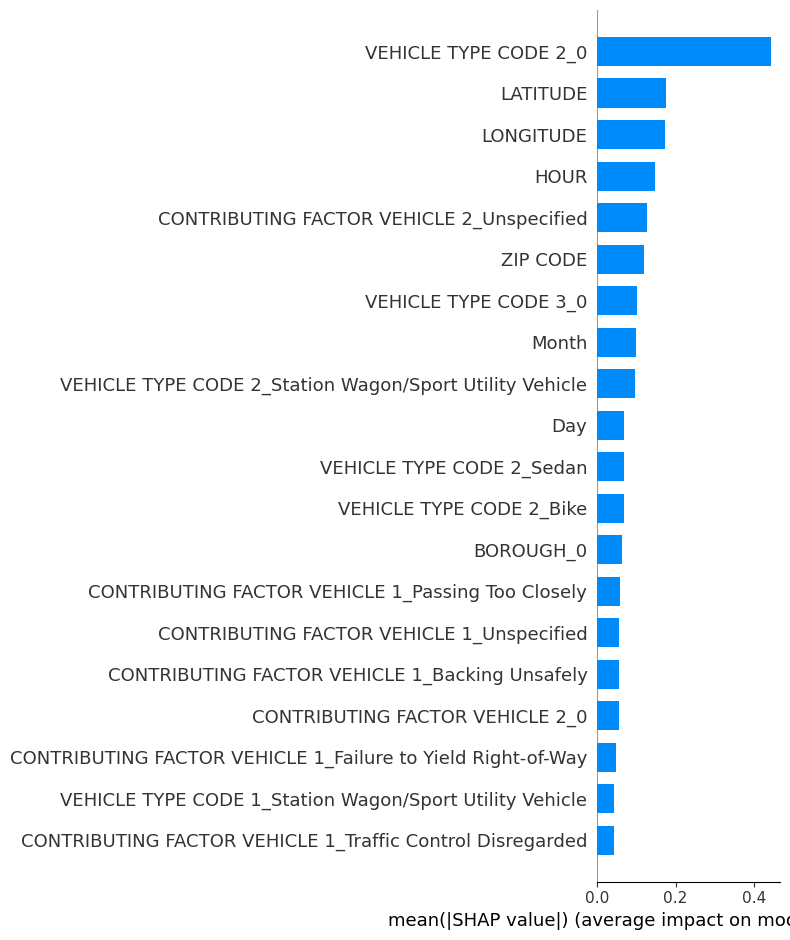

In [518]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [521]:
y_test.iloc[0:27]

80176    False
87676    False
13469     True
11036    False
9174     False
15397    False
33431    False
2714     False
39448    False
13502    False
42445    False
33036    False
11312    False
26847    False
33222    False
55232    False
47763     True
33618    False
1877     False
45620    False
70125    False
6283     False
62571    False
5970     False
19750    False
6856     False
89417     True
Name: Person Injured, dtype: bool

 99%|===================| 18267/18378 [00:59<00:00]        

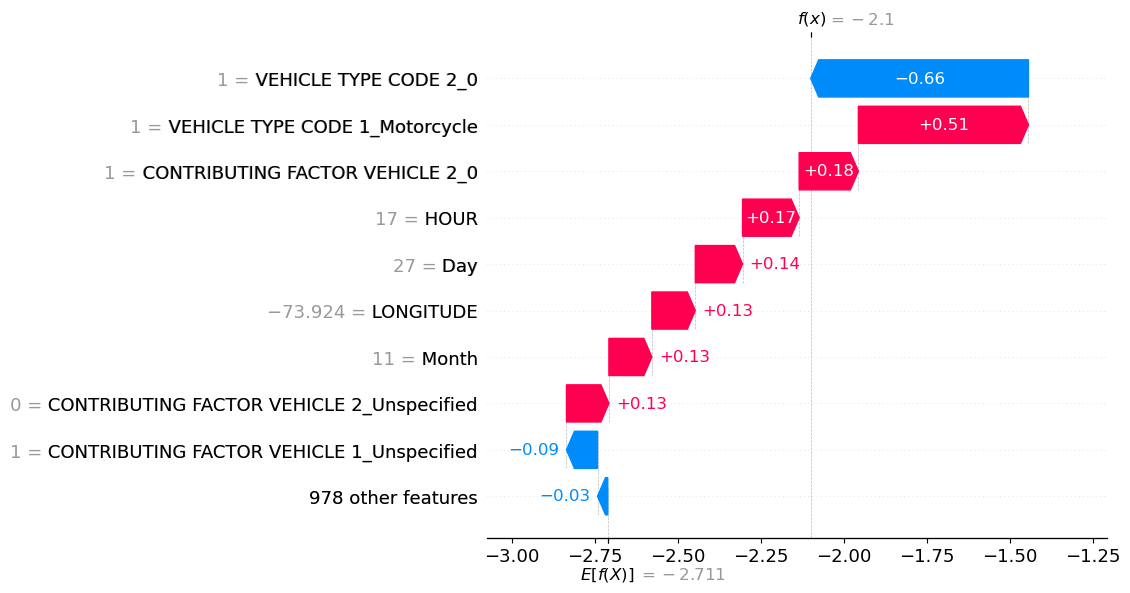

In [520]:
explainer = shap.Explainer(model, X_test) #
shap_values = explainer(X_test,check_additivity=False)
shap.plots.waterfall(shap_values[26])

 99%|===================| 18201/18378 [00:56<00:00]        

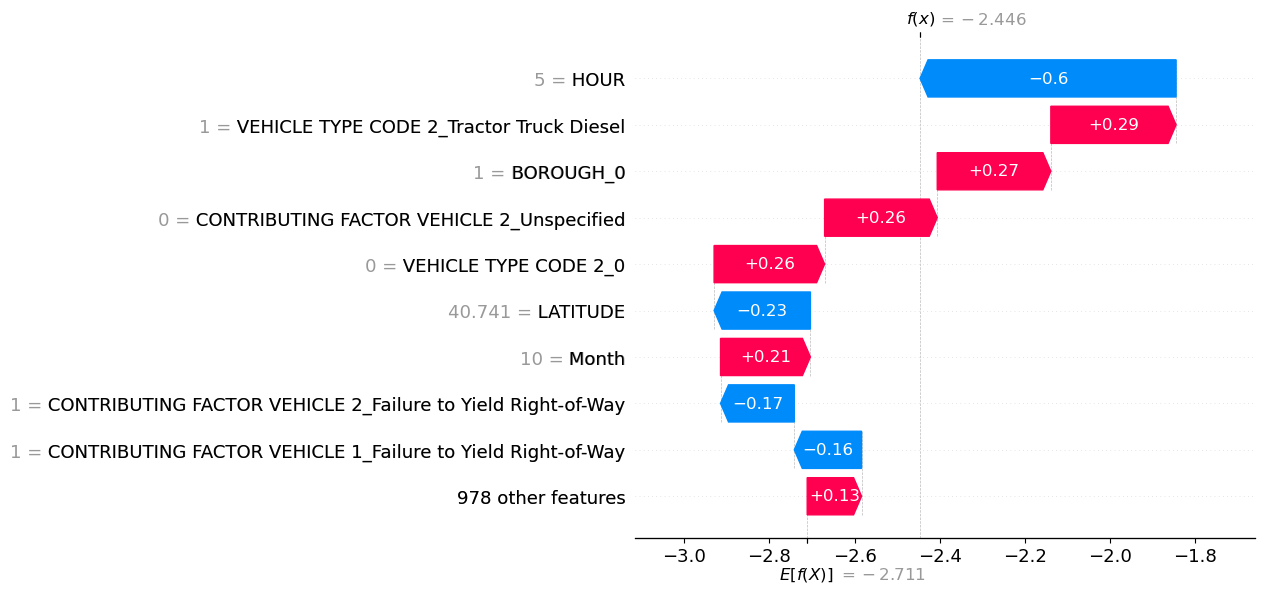

In [522]:
explainer = shap.Explainer(model, X_test) #
shap_values = explainer(X_test,check_additivity=False)
shap.plots.waterfall(shap_values[2])

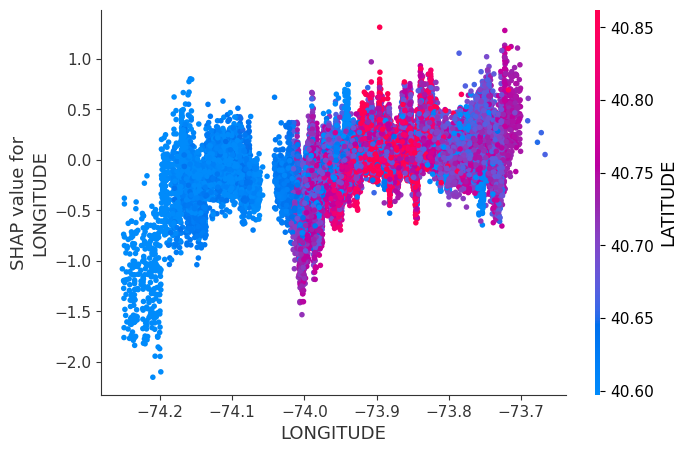

In [398]:
feature_of_interest = "LONGITUDE"
shap.dependence_plot(feature_of_interest, shap_values, X_train)

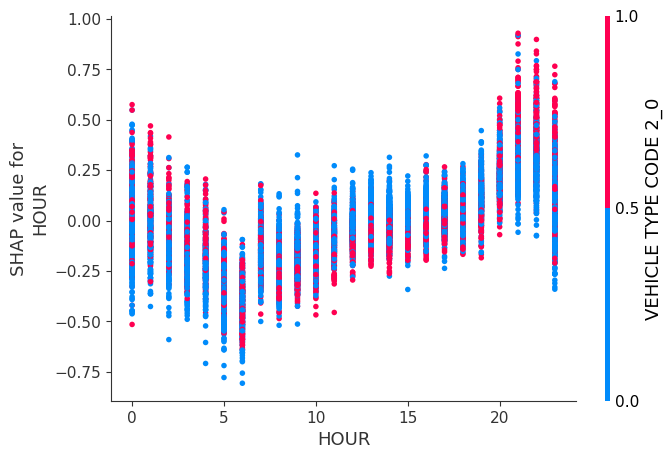

In [527]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
feature_of_interest = "HOUR"
shap.dependence_plot(feature_of_interest, shap_values, X_test)

In [355]:
df_injury_chance.shape

(91888, 48704)

In [52]:
# Initialize and train XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train)

In [53]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False returns RMSE
print("RMSE: ", rmse)

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# Example usage with predictions
rmsle_value = rmsle(y_test, y_pred)
print("RMSLE: ", rmsle_value)

RMSE:  0.683284217637062
RMSLE:  0.3546068140157363


C:\Users\gbatu\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


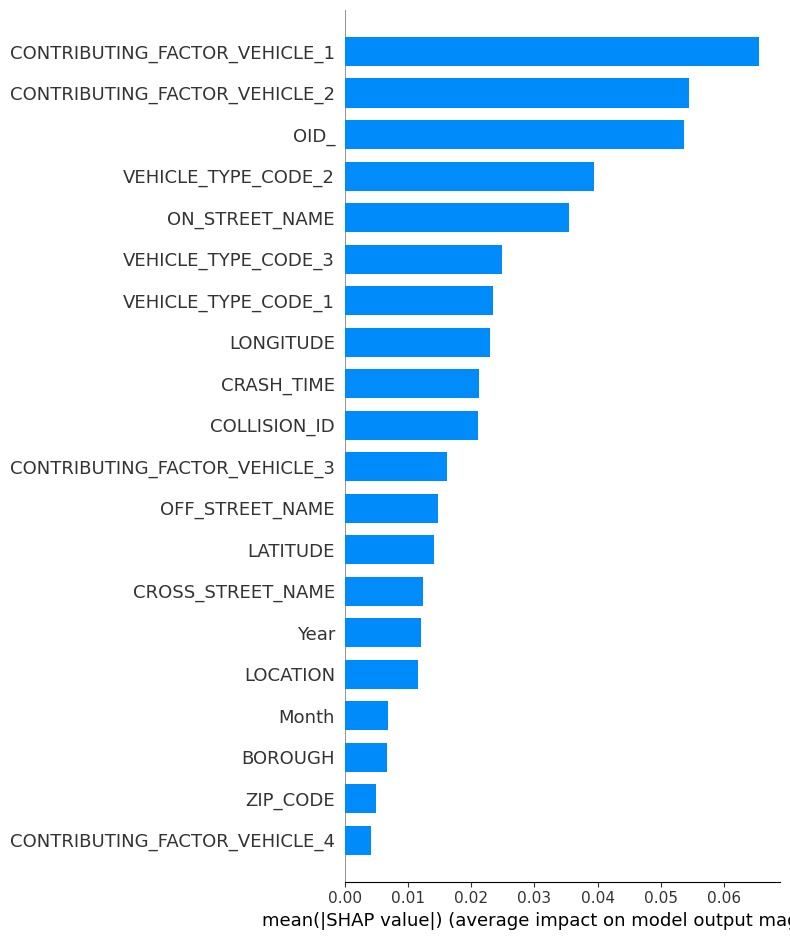

In [54]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_train, plot_type="bar")

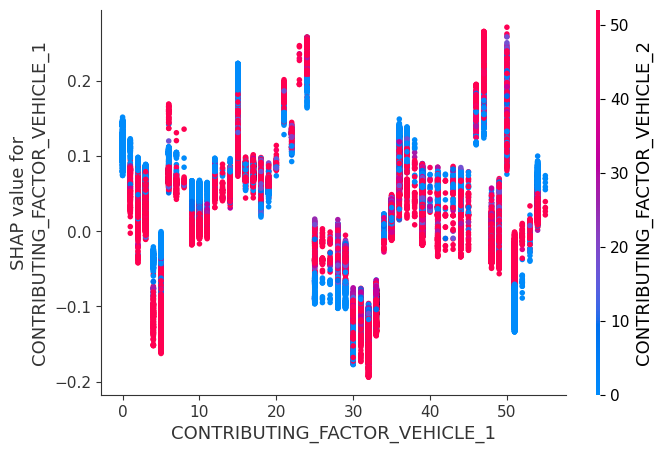

In [49]:
# Choose a feature of interest that is important
feature_of_interest = "CONTRIBUTING_FACTOR_VEHICLE_1"
shap.dependence_plot(feature_of_interest, shap_values, X_train)


In [528]:
# Feature importance
importance = pd.Series(model.feature_importances_, index=X_train.columns)
top_vehicles = importance.sort_values(ascending=False).head(10)  # Top 10 features
print(top_vehicles)

VEHICLE TYPE CODE 2_0                                        0.072846
VEHICLE TYPE CODE 2_Bike                                     0.028158
CONTRIBUTING FACTOR VEHICLE 1_Passing Too Closely            0.024395
VEHICLE TYPE CODE 3_0                                        0.024081
CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely               0.022273
VEHICLE TYPE CODE 4_0                                        0.020679
BOROUGH_0                                                    0.016876
CONTRIBUTING FACTOR VEHICLE 1_Traffic Control Disregarded    0.016113
BOROUGH_QUEENS                                               0.013739
VEHICLE TYPE CODE 2_Carry All                                0.011882
dtype: float32


In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'
)